<a href="https://colab.research.google.com/github/Kambey-san/IMDA/blob/HW_lesson_05/KAA_IMDA_HW_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Введение в анализ данных в медицине
### Урок 5. Персонифицированная и предиктивная медицина/ДЗ


In [11]:
from google.colab import files

In [12]:
# Загрузка файла с локального компьютера
uploaded = files.upload()

Saving Снимок.PNG to Снимок.PNG


In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
image = cv2.imread('/content/Снимок.PNG')

Домашнее задание


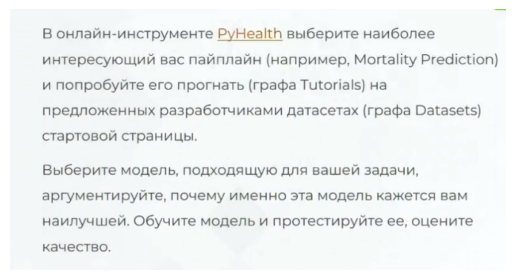

In [27]:
print('Домашнее задание')
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

In [28]:
!pip install pyhealth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1

### **Step 1: Load dataset**
- **[README]:** We call [pyhealth.datasets](https://pyhealth.readthedocs.io/en/latest/api/datasets.html) to process and obtain the dataset.
  - `root` is the arguments directing to the data folder.
  - `tables` is a list of table names from raw databases, which specifies the information that will be used in building the pipeline. Currently, we support [MIMIC3Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC3Dataset.html), [MIMIC4Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC4Dataset.html), [eICUDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.eICUDataset.html), [OMOPDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.OMOPDataset.html).
  - `code_mapping [default: None]` asks a directionary input, specifying the new coding systems for each data table. For example, `{"NDC": ("ATC", {"target_kwargs": {"level": 3}})}` means that our pyhealth will automatically change the codings from `NDC` into ATC-3 level for tables if any.
  - `dev`: if set `True`, will only load a smaller set of patients.
- **[Next Step]:** This `pyhealth.datasets` object will be used in **Step 2**.

In [29]:
from pyhealth.datasets import MIMIC3Dataset

mimic3_ds = MIMIC3Dataset(
        root="https://storage.googleapis.com/pyhealth/Synthetic_MIMIC-III/",
        tables=["DIAGNOSES_ICD", "PROCEDURES_ICD", "PRESCRIPTIONS"],
        code_mapping={"NDC": ("ATC", {"target_kwargs": {"level": 3}})},
        dev=False
)

mimic3_ds.stat()

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
finish basic patient information parsing : 99.78125619888306s
finish parsing DIAGNOSES_ICD : 65.88285970687866s
finish parsing PROCEDURES_ICD : 55.11974620819092s
finish parsing PRESCRIPTIONS : 176.5412266254425s


Mapping codes: 100%|██████████| 49993/49993 [00:55<00:00, 897.91it/s] 



Statistics of base dataset (dev=False):
	- Dataset: MIMIC3Dataset
	- Number of patients: 49993
	- Number of visits: 52769
	- Number of visits per patient: 1.0555
	- Number of events per visit in DIAGNOSES_ICD: 9.1038
	- Number of events per visit in PROCEDURES_ICD: 3.2186
	- Number of events per visit in PRESCRIPTIONS: 32.9969



'\nStatistics of base dataset (dev=False):\n\t- Dataset: MIMIC3Dataset\n\t- Number of patients: 49993\n\t- Number of visits: 52769\n\t- Number of visits per patient: 1.0555\n\t- Number of events per visit in DIAGNOSES_ICD: 9.1038\n\t- Number of events per visit in PROCEDURES_ICD: 3.2186\n\t- Number of events per visit in PRESCRIPTIONS: 32.9969\n'

In [30]:
# data format
mimic3_ds.info()


dataset.patients: patient_id -> <Patient>

<Patient>
    - visits: visit_id -> <Visit> 
    - other patient-level info
    
    <Visit>
        - event_list_dict: table_name -> List[Event]
        - other visit-level info
    
        <Event>
            - code: str
            - other event-level info



In [32]:
uploaded = files.upload()

Saving DS_structure.PNG to DS_structure.PNG


In [33]:
image = cv2.imread('/content/DS_structure.PNG')

Структура данных


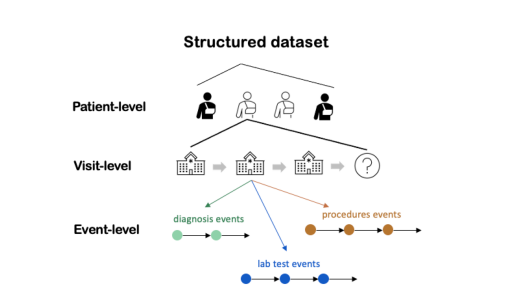

In [35]:
print('Структура данных')
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

In [36]:
# check the information
mimic3_ds.patients
mimic3_ds.patients['947']
mimic3_ds.patients['947'].visits
mimic3_ds.patients['947'].visits['100999']
mimic3_ds.patients['947'].visits['100999'].get_code_list('DIAGNOSES_ICD')

['40390', '3484', '2989']

### **Step 2: Define healthcare task**
- **[README]:** This step assigns a **task function** to the dataset for data loading [pyhealth.tasks](https://pyhealth.readthedocs.io/en/latest/api/tasks.html). The **task function** specifics how to process each pateint's data into a set of samples for the downstream machine learning models.
- **[Next Step]:** This `pyhealth.tasks` object will be used in **Step 3**.

In [37]:
from pyhealth.tasks import drug_recommendation_mimic3_fn

mimic3_ds = mimic3_ds.set_task(task_fn=drug_recommendation_mimic3_fn)
# stats info
mimic3_ds.stat()

Generating samples for drug_recommendation_mimic3_fn: 100%|██████████| 49993/49993 [00:01<00:00, 31912.95it/s]


Statistics of sample dataset:
	- Dataset: MIMIC3Dataset
	- Task: drug_recommendation_mimic3_fn
	- Number of samples: 1858
	- Number of patients: 911
	- Number of visits: 1858
	- Number of visits per patient: 2.0395
	- conditions:
		- Number of conditions per sample: 16.0759
		- Number of unique conditions: 2146
		- Distribution of conditions (Top-10): [('4019', 1107), ('4280', 755), ('42731', 717), ('41401', 713), ('25000', 659), ('2724', 431), ('5849', 412), ('5990', 393), ('53081', 373), ('2720', 295)]
	- procedures:
		- Number of procedures per sample: 5.9462
		- Number of unique procedures: 659
		- Distribution of procedures (Top-10): [('3893', 642), ('9904', 495), ('3961', 431), ('9604', 327), ('9671', 313), ('966', 309), ('8856', 272), ('3615', 268), ('8872', 242), ('3722', 200)]
	- drugs:
		- Number of drugs per sample: 21.4769
		- Number of unique drugs: 178
		- Distribution of drugs (Top-10): [('B05X', 1393), ('A06A', 1295), ('A02B', 1232), ('B01A', 1195), ('N02B', 1182), ('N0

"Statistics of sample dataset:\n\t- Dataset: MIMIC3Dataset\n\t- Task: drug_recommendation_mimic3_fn\n\t- Number of samples: 1858\n\t- Number of patients: 911\n\t- Number of visits: 1858\n\t- Number of visits per patient: 2.0395\n\t- conditions:\n\t\t- Number of conditions per sample: 16.0759\n\t\t- Number of unique conditions: 2146\n\t\t- Distribution of conditions (Top-10): [('4019', 1107), ('4280', 755), ('42731', 717), ('41401', 713), ('25000', 659), ('2724', 431), ('5849', 412), ('5990', 393), ('53081', 373), ('2720', 295)]\n\t- procedures:\n\t\t- Number of procedures per sample: 5.9462\n\t\t- Number of unique procedures: 659\n\t\t- Distribution of procedures (Top-10): [('3893', 642), ('9904', 495), ('3961', 431), ('9604', 327), ('9671', 313), ('966', 309), ('8856', 272), ('3615', 268), ('8872', 242), ('3722', 200)]\n\t- drugs:\n\t\t- Number of drugs per sample: 21.4769\n\t\t- Number of unique drugs: 178\n\t\t- Distribution of drugs (Top-10): [('B05X', 1393), ('A06A', 1295), ('A02B

In [39]:
mimic3_ds.samples[20]

{'visit_id': '110943',
 'patient_id': '10572',
 'conditions': [['5990',
   '2948',
   '4280',
   '42731',
   '5849',
   '40390',
   'E8859',
   'E8798',
   '4240',
   'V5861',
   '70705',
   '42833',
   '36960',
   '82022']],
 'procedures': [['8872']],
 'drugs': ['A12B',
  'A06A',
  'N02B',
  'C07A',
  'V06D',
  'J01D',
  'C03C',
  'A02B',
  'J05A'],
 'drugs_hist': [[]]}

In [40]:
from pyhealth.datasets.splitter import split_by_patient
from pyhealth.datasets import split_by_patient, get_dataloader

# data split
train_dataset, val_dataset, test_dataset = split_by_patient(mimic3_ds, [0.7, 0.15, 0.15])

# create dataloaders (they are <torch.data.DataLoader> object)
train_loader = get_dataloader(train_dataset, batch_size=64, shuffle=True)
val_loader = get_dataloader(val_dataset, batch_size=64, shuffle=True)
test_loader = get_dataloader(test_dataset, batch_size=64, shuffle=True)

### **Step 3: Define ML Model**
- **[README]:** We initialize an ML model for the healthcare task by calling [pyhealth.models](https://pyhealth.readthedocs.io/en/latest/api/models.html).
- **[Next Step]:** This `pyhealth.models` object will be used in **Step 4**.
- **[Other Use Case]:** Our `pyhealth.models` object is as general as any instance from `torch.nn.Module`. Users may use it separately for supporting any other customized pipeline.

In [41]:
from pyhealth.models import Transformer

model = Transformer(
    dataset=mimic3_ds,
    feature_keys=["conditions", "procedures"],
    label_key="drugs",
    mode="multilabel",
)


### **Step 4: Model Training**
- **[README]:** We call our [pyhealth.train.Trainer](https://pyhealth.readthedocs.io/en/latest/api/trainer.html) to train the model by giving the `train_loader`, the `val_loader`, val_metric, and specify other arguemnts, such as epochs, optimizer, learning rate, etc. The trainer will automatically save the best model and output the path in the end.
- **[Next Step]:** The best model will be used in **Step 5** for evaluation.


In [53]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=10,
    monitor="pr_auc_samples",
)

Transformer(
  (embeddings): ModuleDict(
    (conditions): Embedding(2148, 128, padding_idx=0)
    (procedures): Embedding(661, 128, padding_idx=0)
  )
  (linear_layers): ModuleDict()
  (transformer): ModuleDict(
    (conditions): TransformerLayer(
      (transformer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadedAttention(
            (linear_layers): ModuleList(
              (0-2): 3 x Linear(in_features=128, out_features=128, bias=False)
            )
            (output_linear): Linear(in_features=128, out_features=128, bias=False)
            (attention): Attention()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (feed_forward): PositionwiseFeedForward(
            (w_1): Linear(in_features=128, out_features=512, bias=True)
            (w_2): Linear(in_features=512, out_features=128, bias=True)
            (dropout): Dropout(p=0.5, inplace=False)
            (activation): GELU(approximate='none')
          )
          (i

INFO:pyhealth.trainer:Transformer(
  (embeddings): ModuleDict(
    (conditions): Embedding(2148, 128, padding_idx=0)
    (procedures): Embedding(661, 128, padding_idx=0)
  )
  (linear_layers): ModuleDict()
  (transformer): ModuleDict(
    (conditions): TransformerLayer(
      (transformer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadedAttention(
            (linear_layers): ModuleList(
              (0-2): 3 x Linear(in_features=128, out_features=128, bias=False)
            )
            (output_linear): Linear(in_features=128, out_features=128, bias=False)
            (attention): Attention()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (feed_forward): PositionwiseFeedForward(
            (w_1): Linear(in_features=128, out_features=512, bias=True)
            (w_2): Linear(in_features=512, out_features=128, bias=True)
            (dropout): Dropout(p=0.5, inplace=False)
            (activation): GELU(approximate='none')
  

Metrics: None


INFO:pyhealth.trainer:Metrics: None


Device: cpu


INFO:pyhealth.trainer:Device: cpu


INFO:pyhealth.trainer:


Training:


INFO:pyhealth.trainer:Training:


Batch size: 64


INFO:pyhealth.trainer:Batch size: 64


Optimizer: <class 'torch.optim.adam.Adam'>


INFO:pyhealth.trainer:Optimizer: <class 'torch.optim.adam.Adam'>


Optimizer params: {'lr': 0.001}


INFO:pyhealth.trainer:Optimizer params: {'lr': 0.001}


Weight decay: 0.0


INFO:pyhealth.trainer:Weight decay: 0.0


Max grad norm: None


INFO:pyhealth.trainer:Max grad norm: None


Val dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7cbddf60dbd0>


INFO:pyhealth.trainer:Val dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7cbddf60dbd0>


Monitor: pr_auc_samples


INFO:pyhealth.trainer:Monitor: pr_auc_samples


Monitor criterion: max


INFO:pyhealth.trainer:Monitor criterion: max


Epochs: 10


INFO:pyhealth.trainer:Epochs: 10


INFO:pyhealth.trainer:


Epoch 0 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-0, step-21 ---


INFO:pyhealth.trainer:--- Train epoch-0, step-21 ---


loss: 0.1873


INFO:pyhealth.trainer:loss: 0.1873
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 59.09it/s]


--- Eval epoch-0, step-21 ---


INFO:pyhealth.trainer:--- Eval epoch-0, step-21 ---


pr_auc_samples: 0.5527


INFO:pyhealth.trainer:pr_auc_samples: 0.5527


loss: 0.2762


INFO:pyhealth.trainer:loss: 0.2762


New best pr_auc_samples score (0.5527) at epoch-0, step-21


INFO:pyhealth.trainer:New best pr_auc_samples score (0.5527) at epoch-0, step-21


INFO:pyhealth.trainer:


Epoch 1 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-1, step-42 ---


INFO:pyhealth.trainer:--- Train epoch-1, step-42 ---


loss: 0.1822


INFO:pyhealth.trainer:loss: 0.1822
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 63.47it/s]


--- Eval epoch-1, step-42 ---


INFO:pyhealth.trainer:--- Eval epoch-1, step-42 ---


pr_auc_samples: 0.5495


INFO:pyhealth.trainer:pr_auc_samples: 0.5495


loss: 0.2795


INFO:pyhealth.trainer:loss: 0.2795


INFO:pyhealth.trainer:


Epoch 2 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-2, step-63 ---


INFO:pyhealth.trainer:--- Train epoch-2, step-63 ---


loss: 0.1810


INFO:pyhealth.trainer:loss: 0.1810
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 68.46it/s]


--- Eval epoch-2, step-63 ---


INFO:pyhealth.trainer:--- Eval epoch-2, step-63 ---


pr_auc_samples: 0.5512


INFO:pyhealth.trainer:pr_auc_samples: 0.5512


loss: 0.2818


INFO:pyhealth.trainer:loss: 0.2818


INFO:pyhealth.trainer:


Epoch 3 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-3, step-84 ---


INFO:pyhealth.trainer:--- Train epoch-3, step-84 ---


loss: 0.1782


INFO:pyhealth.trainer:loss: 0.1782
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 60.79it/s]


--- Eval epoch-3, step-84 ---


INFO:pyhealth.trainer:--- Eval epoch-3, step-84 ---


pr_auc_samples: 0.5495


INFO:pyhealth.trainer:pr_auc_samples: 0.5495


loss: 0.2865


INFO:pyhealth.trainer:loss: 0.2865


INFO:pyhealth.trainer:


Epoch 4 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-4, step-105 ---


INFO:pyhealth.trainer:--- Train epoch-4, step-105 ---


loss: 0.1760


INFO:pyhealth.trainer:loss: 0.1760
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 56.37it/s]


--- Eval epoch-4, step-105 ---


INFO:pyhealth.trainer:--- Eval epoch-4, step-105 ---


pr_auc_samples: 0.5539


INFO:pyhealth.trainer:pr_auc_samples: 0.5539


loss: 0.2934


INFO:pyhealth.trainer:loss: 0.2934


New best pr_auc_samples score (0.5539) at epoch-4, step-105


INFO:pyhealth.trainer:New best pr_auc_samples score (0.5539) at epoch-4, step-105


INFO:pyhealth.trainer:


Epoch 5 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-5, step-126 ---


INFO:pyhealth.trainer:--- Train epoch-5, step-126 ---


loss: 0.1768


INFO:pyhealth.trainer:loss: 0.1768
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 35.57it/s]


--- Eval epoch-5, step-126 ---


INFO:pyhealth.trainer:--- Eval epoch-5, step-126 ---


pr_auc_samples: 0.5494


INFO:pyhealth.trainer:pr_auc_samples: 0.5494


loss: 0.2854


INFO:pyhealth.trainer:loss: 0.2854


INFO:pyhealth.trainer:


Epoch 6 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-6, step-147 ---


INFO:pyhealth.trainer:--- Train epoch-6, step-147 ---


loss: 0.1778


INFO:pyhealth.trainer:loss: 0.1778
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 35.44it/s]


--- Eval epoch-6, step-147 ---


INFO:pyhealth.trainer:--- Eval epoch-6, step-147 ---


pr_auc_samples: 0.5519


INFO:pyhealth.trainer:pr_auc_samples: 0.5519


loss: 0.3122


INFO:pyhealth.trainer:loss: 0.3122


INFO:pyhealth.trainer:


Epoch 7 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-7, step-168 ---


INFO:pyhealth.trainer:--- Train epoch-7, step-168 ---


loss: 0.1757


INFO:pyhealth.trainer:loss: 0.1757
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 53.17it/s]


--- Eval epoch-7, step-168 ---


INFO:pyhealth.trainer:--- Eval epoch-7, step-168 ---


pr_auc_samples: 0.5461


INFO:pyhealth.trainer:pr_auc_samples: 0.5461


loss: 0.3022


INFO:pyhealth.trainer:loss: 0.3022


INFO:pyhealth.trainer:


Epoch 8 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-8, step-189 ---


INFO:pyhealth.trainer:--- Train epoch-8, step-189 ---


loss: 0.1786


INFO:pyhealth.trainer:loss: 0.1786
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 56.05it/s]


--- Eval epoch-8, step-189 ---


INFO:pyhealth.trainer:--- Eval epoch-8, step-189 ---


pr_auc_samples: 0.5478


INFO:pyhealth.trainer:pr_auc_samples: 0.5478


loss: 0.2949


INFO:pyhealth.trainer:loss: 0.2949


INFO:pyhealth.trainer:


Epoch 9 / 10:   0%|          | 0/21 [00:00<?, ?it/s]

--- Train epoch-9, step-210 ---


INFO:pyhealth.trainer:--- Train epoch-9, step-210 ---


loss: 0.1747


INFO:pyhealth.trainer:loss: 0.1747
Evaluation: 100%|██████████| 5/5 [00:00<00:00, 65.19it/s]


--- Eval epoch-9, step-210 ---


INFO:pyhealth.trainer:--- Eval epoch-9, step-210 ---


pr_auc_samples: 0.5505


INFO:pyhealth.trainer:pr_auc_samples: 0.5505


loss: 0.2871


INFO:pyhealth.trainer:loss: 0.2871


Loaded best model


INFO:pyhealth.trainer:Loaded best model


### **Step 5: Evaluation**

In [54]:
# option 1: use our built-in evaluation metric
score = trainer.evaluate(test_loader)
print (score)

# option 2: use our pyhealth.metrics to evaluate
from pyhealth.metrics.multilabel import multilabel_metrics_fn
y_true, y_prob, loss = trainer.inference(test_loader)
multilabel_metrics_fn(y_true, y_prob, metrics=["pr_auc_samples"])

Evaluation: 100%|██████████| 5/5 [00:00<00:00, 71.38it/s]


{'pr_auc_samples': 0.5435326662680126, 'loss': 0.2944344460964203}


Evaluation: 100%|██████████| 5/5 [00:00<00:00, 73.28it/s]


{'pr_auc_samples': 0.5435326662680126}

**Вывод:**

Оптимальное количество эпох 10, увеличение их количества сверх этой цифры не снижает показатель **loss**. В целом, точность модели, с учетом предварительного перемешивания датафрейма, средняя, т.к. pr_auc_samples ~ 0.54